In [1]:
import os
import rasterio
from rasterio.errors import RasterioIOError

# Ruta base donde están los .tif individuales
base_path = os.path.expanduser("~/raster_data/humedales_giz/")

# Diccionario año: archivo
raster_files = {
    2015: "bb97bc4d-3490-4d50-9de4-2409a160c48e.tif", 2016: "3b342275-80e1-41dc-b10b-bbfec3d959d3.tif",
    2017: "2770a8a2-612c-4e00-b3f2-b8b48bd7d4f6.tif", 2018: "cfb82bc7-a213-4958-af4d-4a7bbf49230c.tif",
    2019: "abf4e94b-abb4-4937-a1a6-cf5be31d7619.tif", 2020: "efbde6dd-0e3e-49a2-99a9-9e84ea09b06e.tif",
    2021: "e75459aa-5d85-4a82-b566-12819c8f3412.tif", 2022: "af2683cb-f449-487c-bda7-9cae9ff67086.tif",
    2023: "a781d13a-f64e-426a-894b-b30724f88bc0.tif", 2024: "3f25ffed-3c4b-4901-9b63-5a58d45300c9.tif"
}


In [4]:
crs_dict = {}

for year, filename in raster_files.items():
    filepath = os.path.join(base_path, filename)
    try:
        with rasterio.open(filepath) as src:
            crs_dict[year] = src.crs.to_string() if src.crs else "❌ No CRS"
    except RasterioIOError as e:
        crs_dict[year] = f"Error abriendo archivo: {e}"

# Mostrar resultados
for year in sorted(crs_dict):
    print(f"Año {year}: {crs_dict[year]}")


Año 2015: EPSG:3857
Año 2016: EPSG:3857
Año 2017: EPSG:3857
Año 2018: EPSG:3857
Año 2019: EPSG:3857
Año 2020: EPSG:3857
Año 2021: EPSG:3857
Año 2022: EPSG:3857
Año 2023: EPSG:3857
Año 2024: EPSG:3857


In [5]:
from collections import Counter

# Contar cantidad de veces que aparece cada CRS
counter = Counter(crs_dict.values())
print("\nResumen de CRS detectados:")
for crs, count in counter.items():
    print(f"• {crs}: {count} archivo(s)")



Resumen de CRS detectados:
• EPSG:3857: 10 archivo(s)


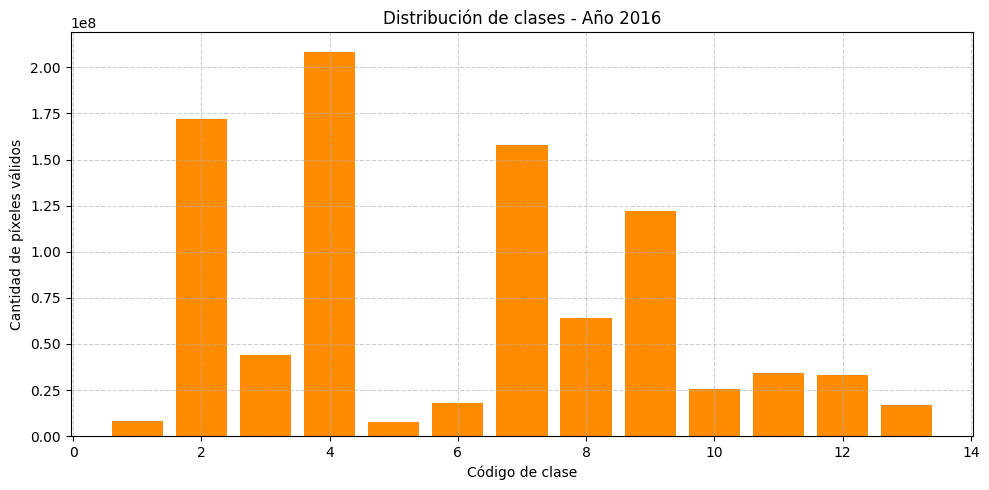

In [10]:
# [5] Visualización opcional
plt.figure(figsize=(10, 5))
plt.bar(df_analisis["Clase"], df_analisis["Pixeles"], color="darkorange")
plt.title(f"Distribución de clases - Año {anio}")
plt.xlabel("Código de clase")
plt.ylabel("Cantidad de píxeles válidos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
